In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
data_set = pd.concat([train, test])

In [3]:
cats = []
conts = []
for i in train.columns:
    if train[i].dtype=='object':
        cats.append(i)
    else:
        conts.append(i)

In [4]:
cats.append('SalePrice')

In [5]:
train_cats =  train[cats]
train_conts =  train[conts]

In [6]:
train_conts.isna().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [7]:
train_conts.corr()['SalePrice'].sort_values(ascending=False).iloc[1:11].index

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')

In [8]:
cont_values = []
for i in train_conts.corr()['SalePrice'].sort_values(ascending=False).iloc[1:11].index:
    cont_values.append(i)

In [9]:
cont_values

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

In [10]:
train_cats

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,175000
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,210000
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal,266500
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal,142125


In [11]:
train_cats.isna().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [12]:
train_cats['Alley'].fillna('no_alley', inplace=True)

C:\Users\leqso\AppData\Local\Temp\ipykernel_14532\3115359143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cats['Alley'].fillna('no_alley', inplace=True)


In [13]:
train_cats['MasVnrType'].fillna('None', inplace=True)

C:\Users\leqso\AppData\Local\Temp\ipykernel_14532\2304299804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cats['MasVnrType'].fillna('None', inplace=True)


In [14]:
train_cats['BsmtQual'].fillna('NB', inplace=True)

C:\Users\leqso\AppData\Local\Temp\ipykernel_14532\1446288970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cats['BsmtQual'].fillna('NB', inplace=True)


In [15]:
train_cats['BsmtCond'].fillna('NB', inplace=True)

C:\Users\leqso\AppData\Local\Temp\ipykernel_14532\758672836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cats['BsmtCond'].fillna('NB', inplace=True)


In [16]:
train_cats['BsmtExposure'].fillna('NB', inplace=True)

C:\Users\leqso\AppData\Local\Temp\ipykernel_14532\849974221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cats['BsmtExposure'].fillna('NB', inplace=True)


In [17]:
train_cats['BsmtFinType1'].fillna('NB', inplace=True)

C:\Users\leqso\AppData\Local\Temp\ipykernel_14532\761161362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cats['BsmtFinType1'].fillna('NB', inplace=True)


In [18]:
train_cats['BsmtFinType2'].fillna('NB', inplace=True)

C:\Users\leqso\AppData\Local\Temp\ipykernel_14532\3617970554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cats['BsmtFinType2'].fillna('NB', inplace=True)


In [19]:
train_cats['Electrical'].fillna('SBrkr', inplace=True)

C:\Users\leqso\AppData\Local\Temp\ipykernel_14532\2043031471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cats['Electrical'].fillna('SBrkr', inplace=True)


In [20]:
train_cats['FireplaceQu'].fillna('NF', inplace=True)

C:\Users\leqso\AppData\Local\Temp\ipykernel_14532\3279911136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cats['FireplaceQu'].fillna('NF', inplace=True)


In [21]:
train_cats['GarageType'].fillna('NG', inplace=True)

C:\Users\leqso\AppData\Local\Temp\ipykernel_14532\374444262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cats['GarageType'].fillna('NG', inplace=True)


In [22]:
train_cats['GarageFinish'].fillna('NG', inplace=True)

C:\Users\leqso\AppData\Local\Temp\ipykernel_14532\2045576977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cats['GarageFinish'].fillna('NG', inplace=True)


In [23]:
train_cats['GarageQual'].fillna('NG', inplace=True)

C:\Users\leqso\AppData\Local\Temp\ipykernel_14532\3440828541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cats['GarageQual'].fillna('NG', inplace=True)


In [24]:
train_cats['GarageCond'].fillna('NG', inplace=True)

C:\Users\leqso\AppData\Local\Temp\ipykernel_14532\4273548210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cats['GarageCond'].fillna('NG', inplace=True)


In [25]:
train_cats['PoolQC'].fillna('NP', inplace=True)

C:\Users\leqso\AppData\Local\Temp\ipykernel_14532\547876945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cats['PoolQC'].fillna('NP', inplace=True)


In [26]:
train_cats['Fence'].fillna('NF', inplace=True)

C:\Users\leqso\AppData\Local\Temp\ipykernel_14532\2279339319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cats['Fence'].fillna('NF', inplace=True)


In [27]:
train_cats['MiscFeature'].fillna('No', inplace=True)

C:\Users\leqso\AppData\Local\Temp\ipykernel_14532\2522182668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cats['MiscFeature'].fillna('No', inplace=True)


In [28]:
from dython.nominal import associations

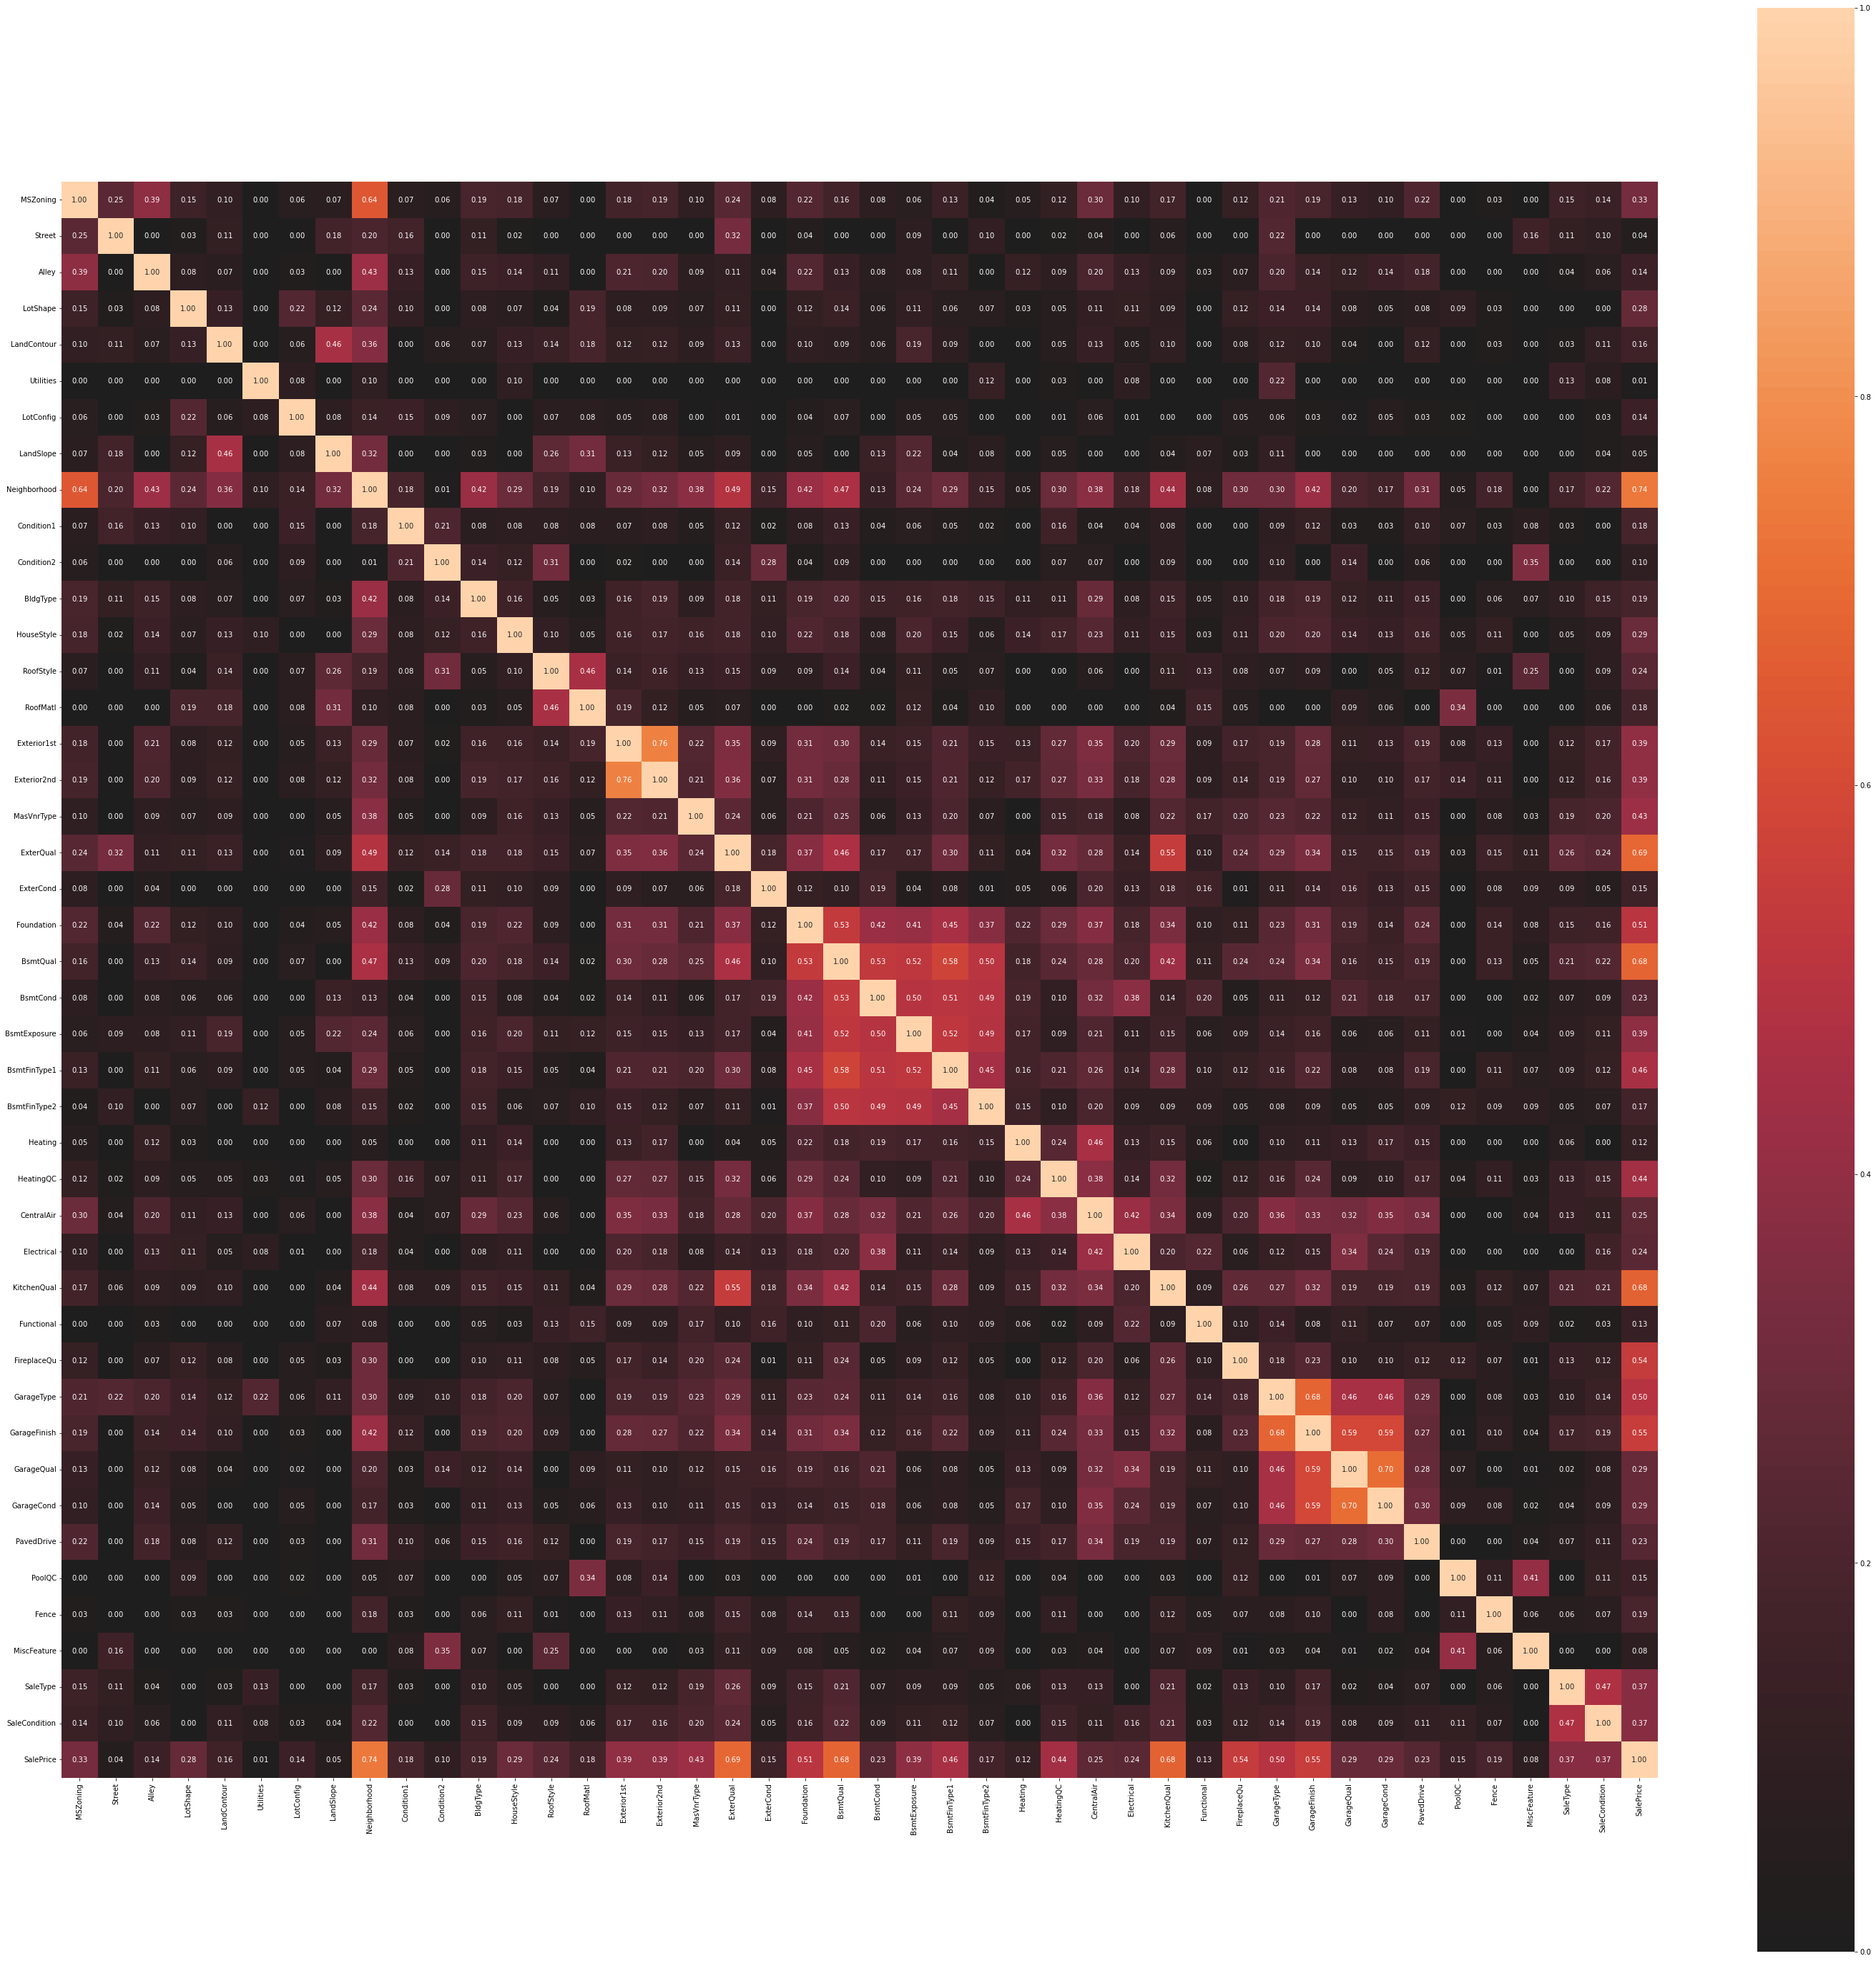

In [29]:
associations(train_cats, figsize=(50,50))
plt.show()

In [30]:
cat_values = ['Neighborhood', 'ExterQual', 'Foundation', 'BsmtQual', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish']

In [31]:
cont_values

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

In [32]:
all_columns = []

for i in cont_values:
    all_columns.append(i)
    
for i in cat_values:
    all_columns.append(i)

all_columns.append('SalePrice')

In [33]:
all_columns

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'Neighborhood',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'SalePrice']

In [34]:
df = data_set[all_columns]

In [35]:
df

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,Neighborhood,ExterQual,Foundation,BsmtQual,KitchenQual,FireplaceQu,GarageType,GarageFinish,SalePrice
0,7,1710,2.0,548.0,856.0,856,2,8,2003,2003,CollgCr,Gd,PConc,Gd,Gd,NaN,Attchd,RFn,208500.0
1,6,1262,2.0,460.0,1262.0,1262,2,6,1976,1976,Veenker,TA,CBlock,Gd,TA,TA,Attchd,RFn,181500.0
2,7,1786,2.0,608.0,920.0,920,2,6,2001,2002,CollgCr,Gd,PConc,Gd,Gd,TA,Attchd,RFn,223500.0
3,7,1717,3.0,642.0,756.0,961,1,7,1915,1970,Crawfor,TA,BrkTil,TA,Gd,Gd,Detchd,Unf,140000.0
4,8,2198,3.0,836.0,1145.0,1145,2,9,2000,2000,NoRidge,Gd,PConc,Gd,Gd,TA,Attchd,RFn,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1092,0.0,0.0,546.0,546,1,5,1970,1970,MeadowV,TA,CBlock,TA,TA,NaN,NaN,NaN,NaN
1455,4,1092,1.0,286.0,546.0,546,1,6,1970,1970,MeadowV,TA,CBlock,TA,TA,NaN,CarPort,Unf,NaN
1456,5,1224,2.0,576.0,1224.0,1224,1,7,1960,1996,Mitchel,TA,CBlock,TA,TA,TA,Detchd,Unf,NaN
1457,5,970,0.0,0.0,912.0,970,1,6,1992,1992,Mitchel,TA,PConc,Gd,TA,NaN,NaN,NaN,NaN


In [36]:
df.isna().sum()

OverallQual        0
GrLivArea          0
GarageCars         1
GarageArea         1
TotalBsmtSF        1
1stFlrSF           0
FullBath           0
TotRmsAbvGrd       0
YearBuilt          0
YearRemodAdd       0
Neighborhood       0
ExterQual          0
Foundation         0
BsmtQual          81
KitchenQual        1
FireplaceQu     1420
GarageType       157
GarageFinish     159
SalePrice       1459
dtype: int64

In [37]:
df['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [38]:
df['GarageCars'].fillna(0.0, inplace=True)
df['GarageArea'].fillna(0.0, inplace=True)
df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean(), inplace=True)
df['BsmtQual'].fillna('NB', inplace=True)
df['KitchenQual'].fillna('TA', inplace=True)
df['FireplaceQu'].fillna('NF', inplace=True)
df['GarageType'].fillna('NG', inplace=True)
df['GarageFinish'].fillna('NG', inplace=True)

C:\Users\leqso\AppData\Local\Temp\ipykernel_14532\3065720013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GarageCars'].fillna(0.0, inplace=True)
C:\Users\leqso\AppData\Local\Temp\ipykernel_14532\3065720013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GarageArea'].fillna(0.0, inplace=True)
C:\Users\leqso\AppData\Local\Temp\ipykernel_14532\3065720013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalBsmtS

In [39]:
df[['Neighborhood', 'ExterQual', 'Foundation', 'BsmtQual', 'KitchenQual',
    'FireplaceQu', 'GarageType', 'GarageFinish', 'SalePrice']]

,Neighborhood,ExterQual,Foundation,BsmtQual,KitchenQual,FireplaceQu,GarageType,GarageFinish,SalePrice
0,CollgCr,Gd,PConc,Gd,Gd,NF,Attchd,RFn,208500.0
1,Veenker,TA,CBlock,Gd,TA,TA,Attchd,RFn,181500.0
2,CollgCr,Gd,PConc,Gd,Gd,TA,Attchd,RFn,223500.0
3,Crawfor,TA,BrkTil,TA,Gd,Gd,Detchd,Unf,140000.0
4,NoRidge,Gd,PConc,Gd,Gd,TA,Attchd,RFn,250000.0
...,...,...,...,...,...,...,...,...,...
1454,MeadowV,TA,CBlock,TA,TA,NF,NG,NG,NaN
1455,MeadowV,TA,CBlock,TA,TA,NF,CarPort,Unf,NaN
1456,Mitchel,TA,CBlock,TA,TA,TA,Detchd,Unf,NaN
1457,Mitchel,TA,PConc,Gd,TA,NF,NG,NG,NaN


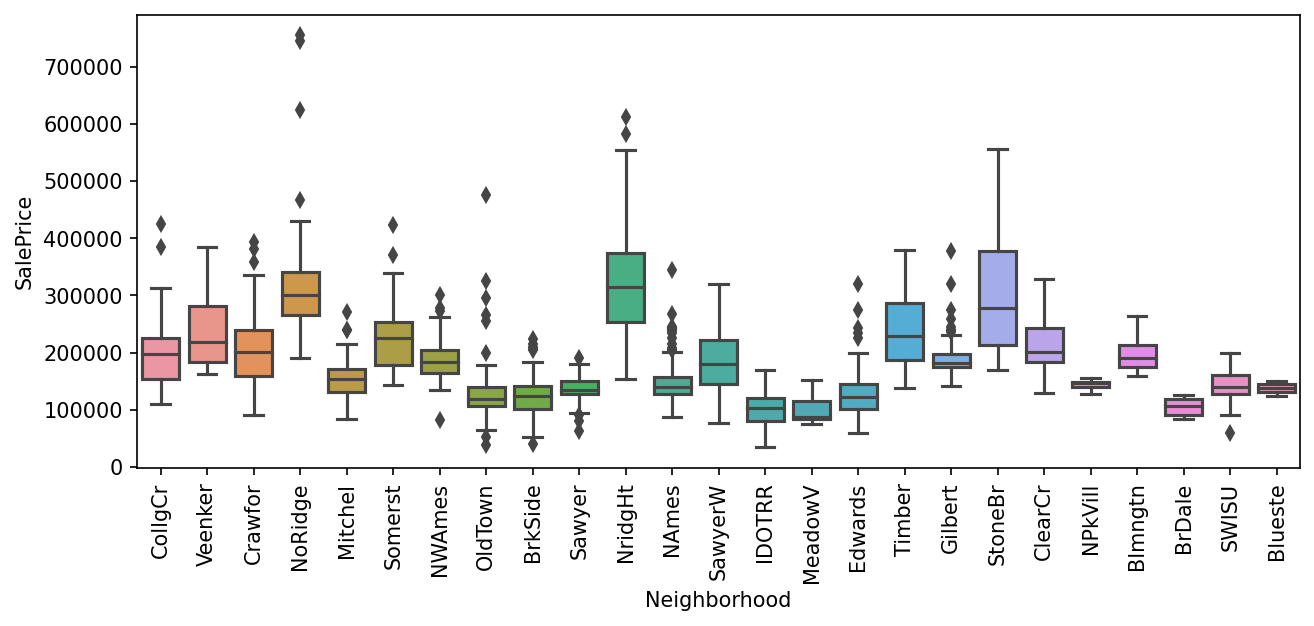

In [40]:
plt.figure(figsize=(10,4), dpi=150)
sns.boxplot(x=df['Neighborhood'].iloc[:1460], y=df['SalePrice'].iloc[:1460])
plt.xticks(rotation=90)

plt.show()

In [41]:
df['Neighborhood'] = df['Neighborhood'].map({'NoRidge':1, 
                        'NridgHt':1, 
                        'StoneBr':0.9, 
                        'OldTown':0.1, 
                        'BrkSide':0.1, 
                        'IDOTRR':0, 
                        'CollgCr':0.4, 
                        'Veenker':0.6, 
                        'Crawfor':0.4, 
                        'Mitchel':0.3, 
                        'Somerst':0.6, 
                        'NWAmes':0.4, 
                        'Sawyer':0.2, 
                        'NAmes':0.3, 
                        'SawyerW':0.4, 
                        'MeadowV':0, 
                        'Edwards':0.15, 
                        'Timber':0.6,
                        'Gilbert':0.4, 
                        'ClearCr':0.5, 
                        'NPkVill':0.2, 
                        'Blmngtn':0.35, 
                        'BrDale':0.0, 
                        'SWISU':0.2, 
                        'Blueste':0.2})

C:\Users\leqso\AppData\Local\Temp\ipykernel_14532\3254871964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Neighborhood'] = df['Neighborhood'].map({'NoRidge':1,


In [42]:
df['ExterQual'] = df['ExterQual'].map({'Gd':0.7, 
                        'TA':0.3, 
                        'Ex':1, 
                        'Fa':0.1, 
})

C:\Users\leqso\AppData\Local\Temp\ipykernel_14532\3180677246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ExterQual'] = df['ExterQual'].map({'Gd':0.7,


In [43]:
df['Foundation'].unique()

array(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], dtype=object)

In [44]:
df['Foundation'] = df['Foundation'].map({'PConc':1, 
                        'CBlock':0.7, 
                        'BrkTil':0.5, 
                        'Wood':0.8, 
                        'Slab':0.3, 
                        'Stone':0.5
})

C:\Users\leqso\AppData\Local\Temp\ipykernel_14532\2283050485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Foundation'] = df['Foundation'].map({'PConc':1,


In [45]:
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'NB', 'Fa'], dtype=object)

In [46]:
df['BsmtQual'] = df['BsmtQual'].map({'Gd':0.7, 
                        'TA':0.5, 
                        'Ex':1, 
                        'Fa':0.2, 'NB':0.1 
})

C:\Users\leqso\AppData\Local\Temp\ipykernel_14532\1466277301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BsmtQual'] = df['BsmtQual'].map({'Gd':0.7,


In [47]:
df['KitchenQual'] = df['KitchenQual'].map({'Gd':0.7, 
                        'TA':0.3, 
                        'Ex':1, 
                        'Fa':0.1, 
})

C:\Users\leqso\AppData\Local\Temp\ipykernel_14532\4132453606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['KitchenQual'] = df['KitchenQual'].map({'Gd':0.7,


In [48]:
df['FireplaceQu'] = df['FireplaceQu'].map({'Gd':0.6, 
                        'TA':0.5, 
                        'Ex':1, 
                        'Fa':0.4, 
                        'NF':0.2, 
                        'Po':0.2 
})

C:\Users\leqso\AppData\Local\Temp\ipykernel_14532\4170553671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FireplaceQu'] = df['FireplaceQu'].map({'Gd':0.6,


In [49]:
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'NG', 'Basment',
       '2Types'], dtype=object)

In [50]:
df['GarageType'] = df['GarageType'].map({
    'BuiltIn':1, 
    '2Types':0.6, 
    'Basment':0.6, 
    'Detchd':0.5, 
    'Attchd':0.8, 
    'CarPort':0.3, 
    'NG':0.2
})

C:\Users\leqso\AppData\Local\Temp\ipykernel_14532\2230681900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GarageType'] = df['GarageType'].map({


In [51]:
df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', 'NG'], dtype=object)

In [52]:
df['GarageFinish'] = df['GarageFinish'].map({
    'RFn':0.8, 
    'Unf':0.5, 
    'Fin':1, 
    'NG':0.2
})

C:\Users\leqso\AppData\Local\Temp\ipykernel_14532\2098326381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GarageFinish'] = df['GarageFinish'].map({


In [53]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
Neighborhood    0.725883
GrLivArea       0.708624
ExterQual       0.675899
KitchenQual     0.655386
BsmtQual        0.642336
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
GarageFinish    0.550810
FireplaceQu     0.539685
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Foundation      0.491793
GarageType      0.490789
Name: SalePrice, dtype: float64

In [54]:
df.isna().sum()

OverallQual        0
GrLivArea          0
GarageCars         0
GarageArea         0
TotalBsmtSF        0
1stFlrSF           0
FullBath           0
TotRmsAbvGrd       0
YearBuilt          0
YearRemodAdd       0
Neighborhood       0
ExterQual          0
Foundation         0
BsmtQual           0
KitchenQual        0
FireplaceQu        0
GarageType         0
GarageFinish       0
SalePrice       1459
dtype: int64

In [55]:
train_df = df.iloc[:len(train)]

In [56]:
train_df

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,Neighborhood,ExterQual,Foundation,BsmtQual,KitchenQual,FireplaceQu,GarageType,GarageFinish,SalePrice
0,7,1710,2.0,548.0,856.0,856,2,8,2003,2003,0.40,0.7,1.0,0.7,0.7,0.2,0.8,0.8,208500.0
1,6,1262,2.0,460.0,1262.0,1262,2,6,1976,1976,0.60,0.3,0.7,0.7,0.3,0.5,0.8,0.8,181500.0
2,7,1786,2.0,608.0,920.0,920,2,6,2001,2002,0.40,0.7,1.0,0.7,0.7,0.5,0.8,0.8,223500.0
3,7,1717,3.0,642.0,756.0,961,1,7,1915,1970,0.40,0.3,0.5,0.5,0.7,0.6,0.5,0.5,140000.0
4,8,2198,3.0,836.0,1145.0,1145,2,9,2000,2000,1.00,0.7,1.0,0.7,0.7,0.5,0.8,0.8,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2.0,460.0,953.0,953,2,7,1999,2000,0.40,0.3,1.0,0.7,0.3,0.5,0.8,0.8,175000.0
1456,6,2073,2.0,500.0,1542.0,2073,2,7,1978,1988,0.40,0.3,0.7,0.7,0.3,0.5,0.8,0.5,210000.0
1457,7,2340,1.0,252.0,1152.0,1188,2,9,1941,2006,0.40,1.0,0.5,0.5,0.7,0.6,0.8,0.8,266500.0
1458,5,1078,1.0,240.0,1078.0,1078,1,5,1950,1996,0.30,0.3,0.7,0.5,0.7,0.2,0.8,0.5,142125.0


In [57]:
test_df = df.iloc[len(train):]

In [58]:
test_df.drop('SalePrice', axis=1, inplace=True)

C:\Users\leqso\AppData\Local\Temp\ipykernel_14532\2577965394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop('SalePrice', axis=1, inplace=True)


In [59]:
test_df

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,Neighborhood,ExterQual,Foundation,BsmtQual,KitchenQual,FireplaceQu,GarageType,GarageFinish
0,5,896,1.0,730.0,882.0,896,1,5,1961,1961,0.3,0.3,0.7,0.5,0.3,0.2,0.8,0.5
1,6,1329,1.0,312.0,1329.0,1329,1,6,1958,1958,0.3,0.3,0.7,0.5,0.7,0.2,0.8,0.5
2,5,1629,2.0,482.0,928.0,928,2,6,1997,1998,0.4,0.3,1.0,0.7,0.3,0.5,0.8,1.0
3,6,1604,2.0,470.0,926.0,926,2,7,1998,1998,0.4,0.3,1.0,0.5,0.7,0.6,0.8,1.0
4,8,1280,2.0,506.0,1280.0,1280,2,5,1992,1992,0.9,0.7,1.0,0.7,0.7,0.2,0.8,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1092,0.0,0.0,546.0,546,1,5,1970,1970,0.0,0.3,0.7,0.5,0.3,0.2,0.2,0.2
1455,4,1092,1.0,286.0,546.0,546,1,6,1970,1970,0.0,0.3,0.7,0.5,0.3,0.2,0.3,0.5
1456,5,1224,2.0,576.0,1224.0,1224,1,7,1960,1996,0.3,0.3,0.7,0.5,0.3,0.5,0.5,0.5
1457,5,970,0.0,0.0,912.0,970,1,6,1992,1992,0.3,0.3,1.0,0.7,0.3,0.2,0.2,0.2


In [60]:
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [63]:
scaler = StandardScaler()

In [64]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
regression_models = [LinearRegression(), 
                     ElasticNet(), 
                     KNeighborsRegressor(), 
                     SVR(), 
                     DecisionTreeRegressor(),
                     RandomForestRegressor(), 
                     AdaBoostRegressor(), 
                     GradientBoostingRegressor()]

for model in regression_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f'Model: {str(model)}')
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'Efficiency: {100 - ((np.sqrt(mean_squared_error(y_test, y_pred)) / y.mean())*100).round(2)}%')
    print('-'*30, '\n')

Model: LinearRegression()
MAE: 22444.442880682524
RMSE: 39219.1226594733
Efficiency: 78.32%
------------------------------ 

Model: ElasticNet()
MAE: 22409.67493928931
RMSE: 39205.239168491345
Efficiency: 78.33%
------------------------------ 

Model: KNeighborsRegressor()
MAE: 22750.04109589041
RMSE: 37397.49000867138
Efficiency: 79.33%
------------------------------ 

Model: SVR()
MAE: 54899.60892633463
RMSE: 80662.17218436244
Efficiency: 55.42%
------------------------------ 

Model: DecisionTreeRegressor()
MAE: 27784.689497716896
RMSE: 39847.091677387434
Efficiency: 77.98%
------------------------------ 

Model: RandomForestRegressor()
MAE: 19131.679629810827
RMSE: 30501.592322573182
Efficiency: 83.14%
------------------------------ 

Model: AdaBoostRegressor()
MAE: 24056.56257719345
RMSE: 33898.039850433735
Efficiency: 81.26%
------------------------------ 

Model: GradientBoostingRegressor()
MAE: 18113.530831351727
RMSE: 26706.64118184171
Efficiency: 85.24%
----------------------

In [66]:
estimator = GradientBoostingRegressor()

In [67]:
help(GradientBoostingRegressor)

Help on class GradientBoostingRegressor in module sklearn.ensemble._gb:

class GradientBoostingRegressor(sklearn.base.RegressorMixin, BaseGradientBoosting)
 |  GradientBoostingRegressor(*, loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for regression.
 |  
 |  GB builds an additive model in a forward stage-wise fashion;
 |  it allows for the optimization of arbitrary differentiable loss functions.
 |  In each stage a regression tree is fit on the negative gradient of the
 |  given loss function.
 |  
 |  Read more in the :ref:`User Guide <gradient_boosting>`.
 |  
 |  Parameters
 |  ----------
 |  loss 

In [68]:
param_grid = {'n_estimators':[10,50,100,500], 
              'max_depth':[3,4,5,6],}

In [69]:
param_model = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=5)

In [70]:
param_model.fit(scaler.fit_transform(X), y)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [10, 50, 100, 500]})

In [71]:
param_model.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [72]:
model = GradientBoostingRegressor(n_estimators=100, max_depth=3)

In [73]:
model.fit(scaler.fit_transform(X), y)

GradientBoostingRegressor()

In [74]:
final_X = scaler.transform(test_df)

In [75]:
y_pred = model.predict(final_X)

In [76]:
sample_submission = pd.read_csv('sample_submission.csv')

In [77]:
sample_submission['SalePrice'] = y_pred

In [78]:
sample_submission

,Id,SalePrice
0,1461,127317.419583
1,1462,145316.169193
2,1463,172888.574853
3,1464,186968.965218
4,1465,203887.387041
...,...,...
1454,2915,76995.365128
1455,2916,80348.506251
1456,2917,151712.301546
1457,2918,116017.446357
